## Evaluation of Quality of GPT-Annotated Labels

* We generated GPT-annotated labels for a sample of SQUAD dataset. Now, our aim is to evaluate the quality of the annotations

In [1]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import string
import regex as re

#### Read data

In [2]:
squad = pd.read_csv('squad_df.csv')

In [60]:
squad['synthetic_answer'].isna().sum()

4

#### Treating Text data

In [3]:
#squad['answer_lower'] = squad['answer'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
# squad['synthetic_answer'] = squad['synthetic_answer'].fillna('isimpossible')
# squad['synthetic_answer_lower'] = squad['synthetic_answer'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

squad['answer_lower'] = squad['answer'].apply(lambda x: x.replace('"',"").replace('?',"").replace('!',"").lower())
squad['synthetic_answer'] = squad['synthetic_answer'].fillna('isimpossible')
squad['synthetic_answer_lower'] = squad['synthetic_answer'].apply(lambda x: re.sub(r'(?<!\d)\.(?!\d)', '', x).replace('"',"").replace('?',"").replace('!',"").lower())

squad['answer_low_word_list'] = squad['answer_lower'].apply(lambda x: x.split(" "))
squad['syn_answer_low_word_list'] = [x.split(" ") for x in squad['synthetic_answer_lower']]

In [36]:
## Testing conversions
squad[['context','answer','answer_low_word_list','synthetic_answer','syn_answer_low_word_list']].loc[704]

context                     She has received co-writing credits for most o...
answer                                                              Cater 2 U
answer_low_word_list                                            [cater, 2, u]
synthetic_answer                                                  "Cater 2 U"
syn_answer_low_word_list                                        [cater, 2, u]
Name: 704, dtype: object

In [11]:
## Testing conversions
squad[['context','answer','answer_low_word_list','synthetic_answer','syn_answer_low_word_list']].loc[42]

context                     Notre Dame is known for its competitive admiss...
answer                                                                  39.1%
answer_low_word_list                                                  [39.1%]
synthetic_answer                                                        39.1%
syn_answer_low_word_list                                              [39.1%]
Name: 42, dtype: object

In [5]:
# squad.head(5)

##### Evaluating the accuracy of GPT-annotated data

In [28]:
squad['quality_check'] = squad['answer']==squad['synthetic_answer']
squad['quality_check'].value_counts()/len(squad)

False    0.604511
True     0.395489
Name: quality_check, dtype: float64

In [27]:
squad['quality_check'] = squad['answer_low_word_list']==squad['syn_answer_low_word_list']
squad['quality_check'].value_counts()/len(squad)

True     0.509062
False    0.490938
Name: quality_check, dtype: float64

In [5]:
squad['quality_check'] = squad['answer_lower']==squad['synthetic_answer_lower']
squad['quality_check'].value_counts()

True     1264
False    1219
Name: quality_check, dtype: int64

In [7]:
# squad[squad['quality_check']==0].head(5)

#### Direct string match comparison does not seem to be the most accurate way of evaluating quality of GPt-annotated labels. We need to find better metrics. Thus, we will use BLEU score

#### Evalauting BLEU Score parameters

In [ ]:
ref = ["my","name","is","palash","choudhary"]
check = ["palash","choudhary"]
print(f'Synthetic string:{ref}')
print(f'Actual string:{check}')

print(f"1 Gram:{sentence_bleu([ref],check, weights=(1,0,0,0))}")
print(f"2 Gram:{sentence_bleu([ref],check, weights=(0,1,0,0))}")
print(f"3 Gram:{sentence_bleu([ref],check, weights=(0,0,1,0))}")
print(f"4 Gram:{sentence_bleu([ref],check, weights=(0,0,0,1))}")
print(f"Equal Gram:{sentence_bleu([ref],check, weights=(0.25,0.25,0.25,0.25))}")
print(f"No weights Gram:{sentence_bleu([ref],check)}")
smoothie4 = SmoothingFunction().method4
print(f"SmoothieMethod 4 Gram:{sentence_bleu([ref],check,smoothing_function=smoothie4)}")
smoothie3 = SmoothingFunction().method3
print(f"SmoothieMethod 3 Gram:{sentence_bleu([ref],check,smoothing_function=smoothie3)}")

Synthetic string:['my', 'name', 'is', 'palash', 'choudhary']
Actual string:['palash', 'choudhary']
1 Gram:0.22313016014842982
2 Gram:0.22313016014842982
3 Gram:4.9648108639081e-309
4 Gram:4.9648108639081e-309
Equal Gram:3.3283615235885645e-155
No weights Gram:3.3283615235885645e-155
SmoothieMethod 4 Gram:0.04939847123496026
SmoothieMethod 3 Gram:0.13267398701010466


C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [14]:
ref = squad['answer_low_word_list'][0]
check = squad['syn_answer_low_word_list'][0]
print(f'Synthetic string:{ref}')
print(f'Actual string:{check}')

print(f"1 Gram:{sentence_bleu([ref],check, weights=(1,0,0,0))}")
print(f"2 Gram:{sentence_bleu([ref],check, weights=(0,1,0,0))}")
print(f"3 Gram:{sentence_bleu([ref],check, weights=(0,0,1,0))}")
print(f"4 Gram:{sentence_bleu([ref],check, weights=(0,0,0,1))}")
print(f"Equal Gram:{sentence_bleu([ref],check, weights=(0.25,0.25,0.25,0.25))}")
print(f"No weights Gram:{sentence_bleu([ref],check)}")
smoothie4 = SmoothingFunction().method4
print(f"SmoothieMethod 4 Gram:{sentence_bleu([ref],check,smoothing_function=smoothie4)}")
smoothie3 = SmoothingFunction().method3
print(f"SmoothieMethod 3 Gram:{sentence_bleu([ref],check,smoothing_function=smoothie3)}")

Synthetic string:['saint', 'bernadette', 'soubirous']
Actual string:['saint', 'bernadette', 'soubirous']
1 Gram:1.0
2 Gram:1.0
3 Gram:1.0
4 Gram:2.2250738585072626e-308
Equal Gram:1.2213386697554703e-77
No weights Gram:1.2213386697554703e-77
SmoothieMethod 4 Gram:0.5757197301274735
SmoothieMethod 3 Gram:0.8408964152537145


C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [71]:
# print(f'Synthetic string:{squad["syn_answer_low_word_list"][0]}')
# print(f'Actual string:{squad["answer_low_word_list"][0]}')
ref = ["september","1876"]
check = ["1876"]
print(f'Actual string:{ref}')
print(f'Synthetic string:{check}')

print(f"1 Gram:{sentence_bleu([ref],check, weights=(1,0,0,0))}")
print(f"2 Gram:{sentence_bleu([ref],check, weights=(0,1,0,0))}")
print(f"3 Gram:{sentence_bleu([ref],check, weights=(0,0,1,0))}")
print(f"4 Gram:{sentence_bleu([ref],check, weights=(0,0,0,1))}")
print(f"Equal Gram:{sentence_bleu([ref],check, weights=(0.25,0.25,0.25,0.25))}")
print(f"No weights Gram:{sentence_bleu([ref],check)}")
smoothie4 = SmoothingFunction().method4
print(f"SmoothieMethod 4 Gram:{sentence_bleu([ref],check,smoothing_function=smoothie4)}")
smoothie3 = SmoothingFunction().method3
print(f"SmoothieMethod 3 Gram:{sentence_bleu([ref],check,smoothing_function=smoothie3)}")

Actual string:['september', '1876']
Synthetic string:['1876']
1 Gram:0.36787944117144233
2 Gram:8.18558927632837e-309
3 Gram:8.18558927632837e-309
4 Gram:8.18558927632837e-309
Equal Gram:6.702145341854094e-232
No weights Gram:6.702145341854094e-232
SmoothieMethod 4 Gram:0.36787944117144233
SmoothieMethod 3 Gram:0.13006502375572224


C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-pa

#### We decide to move with a combination of 1 gram and method 3 BLEU score

In [4]:
squad['bleu_score'] = [max(sentence_bleu([squad['answer_low_word_list'][i]], squad['syn_answer_low_word_list'][i],
                                     smoothing_function=SmoothingFunction().method3),
                                     sentence_bleu([squad['answer_low_word_list'][i]], squad['syn_answer_low_word_list'][i],
                                     weights=(1,0,0,0))
                                     ) for i in range(0, len(squad))]
#squad.head(10)

C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\mails\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-pa

In [5]:
squad['bleu_score'].describe()

count    2483.000000
mean        0.677994
std         0.379201
min         0.000000
25%         0.333333
50%         1.000000
75%         1.000000
max         1.000000
Name: bleu_score, dtype: float64

(array([ 320.,  115.,  123.,  122.,   45.,  229.,  116.,   82.,   64.,
        1267.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

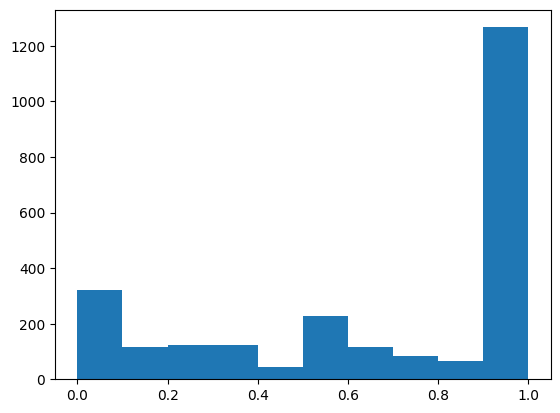

In [6]:
import matplotlib.pyplot as plt

plt.hist(squad['bleu_score'].tolist())

In [7]:
len(squad[squad['bleu_score']>=0.5])/len(squad)

0.7080144985904149

In [ ]:
#squad[(squad['bleu_score']>=0.4) & (squad['bleu_score']<0.5)]

#### Experimentation with weighted BLEU score(Optional)

In [11]:
# squad['ans_length'] = [len(squad['answer_low_word_list'][x]) for x in range(0, len(squad))]
# squad['syn_ans_length'] = [len(squad['syn_answer_low_word_list'][x]) for x in range(0, len(squad))]
# squad['weighted_bleu_score'] = squad['bleu_score']*(squad['ans_length'])/squad['syn_ans_length']

In [12]:
# squad['weighted_bleu_score'].describe()

count    2483.000000
mean        0.627556
std         0.417916
min         0.000000
25%         0.160000
50%         0.955375
75%         1.000000
max         1.000000
Name: weighted_bleu_score, dtype: float64

(array([ 529.,  113.,  169.,   33.,   92.,  136.,   62.,   50.,   29.,
        1270.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

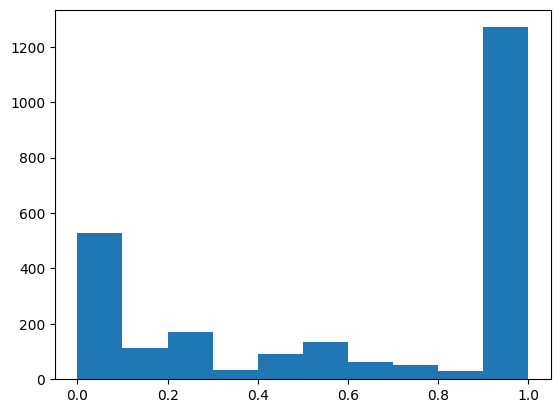

In [13]:
# plt.hist(squad['weighted_bleu_score'].tolist())

In [ ]:
#squad[(squad['bleu_score']>=0.3) & (squad['bleu_score']<=0.4)]

#### Experimentation with conidtional BLEU score (optional)

In [14]:
# squad['final_bleu_score'] = [squad['weighted_bleu_score'][x] if squad['weighted_bleu_score'][x] > squad['bleu_score'][x]
#                               else squad['bleu_score'][x]  for x in range(0, len(squad))]

In [15]:
# len(squad[squad['final_bleu_score']>=0.5])/len(squad)

0.7136528393072896

In [16]:
# squad[(squad['weighted_bleu_score']>=0.3) & (squad['weighted_bleu_score']<=0.4)][["answer","synthetic_answer","answer_low_word_list","syn_answer_low_word_list","bleu_score","weighted_bleu_score","final_bleu_score"]].head(15)

In [80]:
# squad['final_bleu_score'].describe()

count    2483.000000
mean        0.675896
std         0.381131
min         0.000000
25%         0.333333
50%         0.955375
75%         1.000000
max         1.000000
Name: final_bleu_score, dtype: float64

(array([ 347.,  105.,  107.,   93.,   59.,  251.,  104.,   88.,   58.,
        1271.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

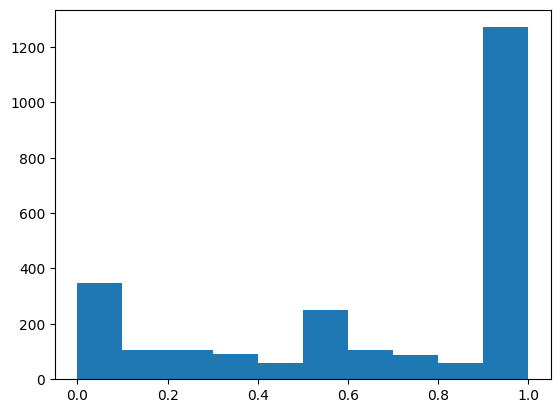

In [17]:
# plt.hist(squad['final_bleu_score'].tolist())

#### conclusion
* Post text treatment, bleu score is a good approximation. Will use it for assessing quality of the data

In [ ]:
squad.groupby(['quality_check'])['bleu_score'].mean()

In [ ]:
len(squad[squad['bleu_score']>=0.5])/len(squad)

0.7200966572694322

#### Generating Start position for GPT-annotated labels

In [9]:
squad_v1 = squad[["question","context","answer","synthetic_answer","answer_lower","synthetic_answer_lower","answer_low_word_list","syn_answer_low_word_list","bleu_score"]]

In [21]:
text = "my name is palash choudhary"
key = "palash choudhary"
text.find(key)

11

In [10]:
squad_v1['answer_start_pos'] = [squad_v1['context'][x].find(squad_v1['answer'][x]) for x in range(0, len(squad_v1))]
squad_v1['answer_start_pos'].describe()

C:\Users\mails\AppData\Local\Temp\ipykernel_34668\1041011714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squad_v1['answer_start_pos'] = [squad_v1['context'][x].find(squad_v1['answer'][x]) for x in range(0, len(squad_v1))]


count    2483.000000
mean      326.735803
std       294.403395
min         0.000000
25%       109.000000
50%       247.000000
75%       466.500000
max      2103.000000
Name: answer_start_pos, dtype: float64

In [11]:
# squad_v1['syn_answer_start_pos'] = [squad_v1['context'][x].translate(str.maketrans('', '', string.punctuation)).lower().find(squad_v1['synthetic_answer'][x].translate(str.maketrans('', '', string.punctuation)).lower()) for x in range(0, len(squad_v1))]
# squad_v1['syn_answer_start_pos'].describe()

squad_v1['syn_answer_start_pos'] = [squad_v1['context'][x].lower().find(squad_v1['synthetic_answer_lower'][x]) for x in range(0, len(squad_v1))]
squad_v1['syn_answer_start_pos'] = [squad_v1['context'][x].lower().find(squad_v1['syn_answer_low_word_list'][x][0]) 
                                    if squad_v1['syn_answer_start_pos'][x]==-1 else squad_v1['syn_answer_start_pos'][x]
                                      for x in range(0, len(squad_v1))]

squad_v1['syn_answer_start_pos'].describe()

C:\Users\mails\AppData\Local\Temp\ipykernel_34668\233638732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squad_v1['syn_answer_start_pos'] = [squad_v1['context'][x].lower().find(squad_v1['synthetic_answer_lower'][x]) for x in range(0, len(squad_v1))]
C:\Users\mails\AppData\Local\Temp\ipykernel_34668\233638732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squad_v1['syn_answer_start_pos'] = [squad_v1['context'][x].lower().find(squad_v1['syn_answer_low_word_list'][x][0])


count    2483.000000
mean      287.786549
std       295.903034
min        -1.000000
25%        64.500000
50%       206.000000
75%       411.000000
max      2081.000000
Name: syn_answer_start_pos, dtype: float64

In [12]:
len(squad_v1[squad_v1['syn_answer_start_pos']==-1])

117

In [16]:
squad_v1[squad_v1['syn_answer_start_pos']==-1].head(10)

,question,context,answer,synthetic_answer,answer_lower,synthetic_answer_lower,answer_low_word_list,syn_answer_low_word_list,bleu_score,answer_start_pos,syn_answer_start_pos
18,How many departments are within the Stinson-Re...,The College of Engineering was established in ...,five,Three,five,three,[five],[three],0.000000,271,-1
27,In what year was a Master of Arts course first...,"The university first offered graduate degrees,...",1854,1854-1855,1854,1854-1855,[1854],[1854-1855],0.000000,92,-1
31,In what year was the Joan B. Kroc Institute fo...,The Joan B. Kroc Institute for International P...,1986,1986.,1986,1986.,[1986],[1986.],0.000000,303,-1
50,What was the lifespan of John Augustine Zahm?,"Father Joseph Carrier, C.S.C. was Director of ...",1851–1921,1851-1921,1851–1921,1851-1921,[1851–1921],[1851-1921],0.000000,353,-1
72,What threat does the Global Adaptation Index s...,As of 2012[update] research continued in many ...,climate change,Vulnerability to climate change,climate change,vulnerability to climate change,"[climate, change]","[vulnerability, to, climate, change]",0.500000,891,-1
118,What was the lifespan of Theodore Hesburgh?,"The Rev. Theodore Hesburgh, C.S.C., (1917–2015...",1917–2015,1917-2015,1917–2015,1917-2015,[1917–2015],[1917-2015],0.000000,37,-1
121,During what years was Theodor Hesburgh preside...,"The Rev. Theodore Hesburgh, C.S.C., (1917–2015...",1952–87,1952-1987,1952–87,1952-1987,[1952–87],[1952-1987],0.000000,82,-1
128,During what years was Edward Malloy president ...,In the 18 years under the presidency of Edward...,1987–2005,1987-2005,1987–2005,1987-2005,[1987–2005],[1987-2005],0.000000,64,-1
171,In 1899 Notre Dame formed which college?,The School of Architecture was established in ...,School of Architecture,College of Architecture,school of architecture,college of architecture,"[school, of, architecture]","[college, of, architecture]",0.666667,4,-1
179,Currently where does Notre Dame's library rank...,The library system also includes branch librar...,one of the 100 largest,Notre Dame's library remains one of the 100 la...,one of the 100 largest,notre dame's library remains one of the 100 la...,"[one, of, the, 100, largest]","[notre, dame's, library, remains, one, of, the...",0.384615,654,-1


##### Examples

In [17]:
squad_v1['context'][179]

"The library system also includes branch libraries for Architecture, Chemistry & Physics, Engineering, Law, and Mathematics as well as information centers in the Mendoza College of Business, the Kellogg Institute for International Studies, the Joan B. Kroc Institute for International Peace Studies, and a slide library in O'Shaughnessy Hall. A theology library was also opened in fall of 2015. Located on the first floor of Stanford Hall, it is the first branch of the library system to be housed in a dorm room. The library system holds over three million volumes, was the single largest university library in the world upon its completion, and remains one of the 100 largest libraries in the country."

In [59]:
squad_v1['context'][39].translate(str.maketrans('', '', string.punctuation))

'Notre Dame is known for its competitive admissions with the incoming class enrolling in fall 2015 admitting 3577 from a pool of 18156 197 The academic profile of the enrolled class continues to rate among the top 10 to 15 in the nation for national research universities The university practices a nonrestrictive early action policy that allows admitted students to consider admission to Notre Dame as well as any other colleges to which they were accepted 1400 of the 3577 391 were admitted under the early action plan Admitted students came from 1311 high schools and the average student traveled more than 750 miles to Notre Dame making it arguably the most representative university in the United States While all entering students begin in the College of the First Year of Studies 25 have indicated they plan to study in the liberal arts or social sciences 24 in engineering 24 in business 24 in science and 3 in architecture'

#### Files

In [25]:
df = squad_v1[['context', 'question', 'synthetic_answer_lower','bleu_score','syn_answer_start_pos']]
print(len(df))
df = df[df['syn_answer_start_pos']!=-1]
print(len(df))
df = df[~(df['synthetic_answer_lower']=='isimpossible')]
print(len(df))
# answer_dict = {'text':squad_v1['synthetic_answer_lower'].to_list(),
#                'answer_start': squad_v1['syn_answer_start_pos'].to_list()}
answers_list = [{'text':x[0], 'answer_start':x[1]} for x in zip(df['synthetic_answer_lower'].to_list(), df['syn_answer_start_pos'].to_list())]

final_dict = {'Train':["Train"]*len(df),
              'question': df['question'].to_list(),
              'context': df['context'].to_list(),
              'answer': answers_list}


2483
2366
2366


In [26]:
import json
with open('squal_training_final_dict.json', 'w') as f:
    json.dump(final_dict, f)